In [22]:
%pylab inline
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


This notebook is for:
* displaying the format of BEAGLE files produced for mock catalogue creation using BEAGLE_mock_catalogue_from_file.param

In [23]:
fileName = "catalogue.fits"

Each BEAGLE .fits.gz file contains different extensions containing different properties of each object.  Each row contains information for a different object, and the same row will contain information for the same object across the different extensions.

In [24]:
catalogue = fits.open(fileName)

In [25]:
print catalogue.info()

Filename: catalogue.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    GALAXY PROPERTIES  BinTableHDU     47   3R x 14C     [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
2    STAR FORMATION  BinTableHDU     22   3R x 5C      [1E, 1E, 1E, 1E, 1E]   
3    STAR FORMATION BINS  BinTableHDU     28   3R x 7C      [1E, 1E, 1E, 1E, 1E, 1E, 1E]   
4    DUST ATTENUATION  BinTableHDU     31   3R x 9C      [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
5    NEBULAR EMISSION  BinTableHDU    407   3R x 134C    [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E

It is also possible to view the different extensions and their content in fv (see http://heasarc.gsfc.nasa.gov/docs/software/ftools/fv/ for downloads).

<img src="extensions_fv.png" style="width: 800px;">

If you have chosen to print out the spectra in the BEAGLE param file, there will be an extension containing the full sed.  One can view the spectra as so:

In [44]:
wl = catalogue['FULL SED WL'].data[0][0]
obj = 0
spec = catalogue['FULL SED'].data[obj,:]

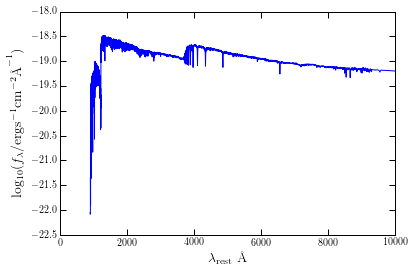

In [45]:
pylab.plot(wl, log10(spec))

ax=plt.gca()
ax.set_xlim(0,10000)

pylab.xlabel('$\lambda_{\\textnormal{rest}}$ $\\textnormal{\AA}$', fontsize=14)
pylab.ylabel('log$_{10}$($f_{\lambda} /\\textnormal{erg} \\textnormal{s}^{-1} \\textnormal{cm}^{-2} \\textnormal{\AA}^{-1}$)', \
             fontsize=14)

If you have enough objects in the catalogue, viewing the spectra as an image can be useful.  

Again, this can be viewed easily using fv:

<img src=spectra_fv.png style="width: 800px;">

Our catalogue doesn't have that many objects, but here's how you would show them all in an image view using python.

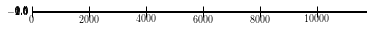

In [46]:
plt.imshow(catalogue['FULL SED'].data, aspect=10)